# Analyse time-dependent proteome

## 1. Load data into workbook

In [3]:
import cPickle as pkl
import re
import random
import os.path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh
import collections
from statsmodels.nonparametric.smoothers_lowess import lowess

Write part of the directory listing to a variable:

In [4]:
import platform
if platform.system()=="Windows":
    files = !ls ..\results\pol*
else:
    files = !ls ../results/pol*

Set up a dictionary that contains the simulation results.

In [5]:
filepaths = {}
for file in files:
    match = re.search(r'from (\w+)', file)
    filepaths[int(match.group(1).zfill(4))] = file

Function to replace _numpypy.multiarray by numpy.core.multiarray. Source: http://stackoverflow.com/questions/39086/search-and-replace-a-line-in-a-file-in-python

In [6]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

Port from Pypy to Python:

In [7]:
for time in filepaths:
    print time,
    replace(filepaths[time], "_numpypy.multiarray", "numpy.core.multiarray")

0 2400 3300 1800 300 2700 1200 600 2100 3000 900 1500


Create proteome dictionary:

In [8]:
results = {}
proteome = {}
for time in filepaths:
    print time,
    results[time] = pkl.load(open(filepaths[time]))
    proteome[time] = {key: results[time]['proteome'][key] for key in results[time]['proteome'] 
                     if results[time]['proteome'][key] > 1e-1}

0 2400 3300 1800 300 2700 1200 600 2100 3000 900 1500


## 2. Test whether burn-in period has been long enough

Plot timecourses:

In [9]:
time = 300
protnames = results[time]['timecourses'].keys()
size = 5
protnames_plot = np.array(random.sample(protnames, size*size))
protnames_plot.shape = (size, size)

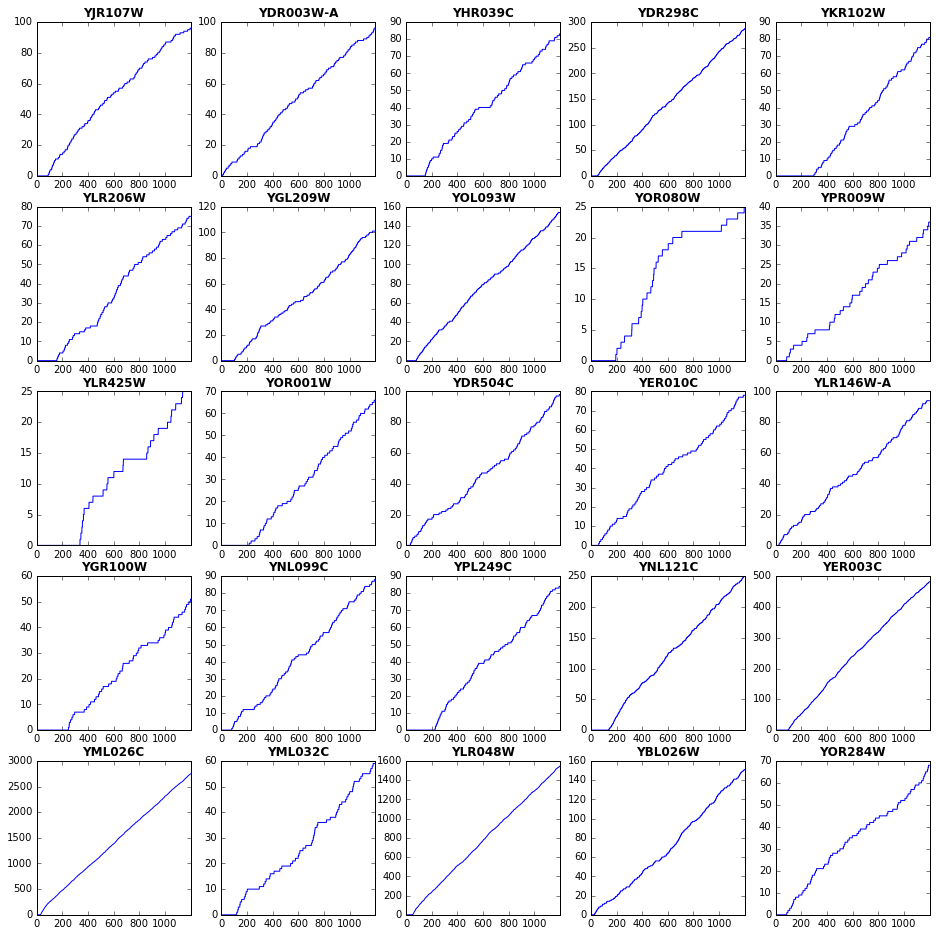

In [10]:
fig, ax = plt.subplots(size, size, figsize=(16, 16))

for i in range(size):
    for j in range(size):
        yseries = results[time]['timecourses'][protnames_plot[i][j]]
        xseries = np.arange(0., float(len(yseries)), 1.)
        # oddly, sometimes the simulation sometimes 'loses' one data point
        length = min(len(xseries), len(yseries))
        ax[i, j].plot(xseries[:length], yseries[:length])
        ax[i, j].set_xticks(np.arange(min(xseries), max(xseries)+1, 200.0))
        ax[i, j].set_title(protnames_plot[i][j], fontdict={'fontsize': 12, 'fontweight': 'bold'})
        ax[i, j].tick_params(axis='both', which='major', labelsize=10)

Plot increases and check for saturation of "first derivative":

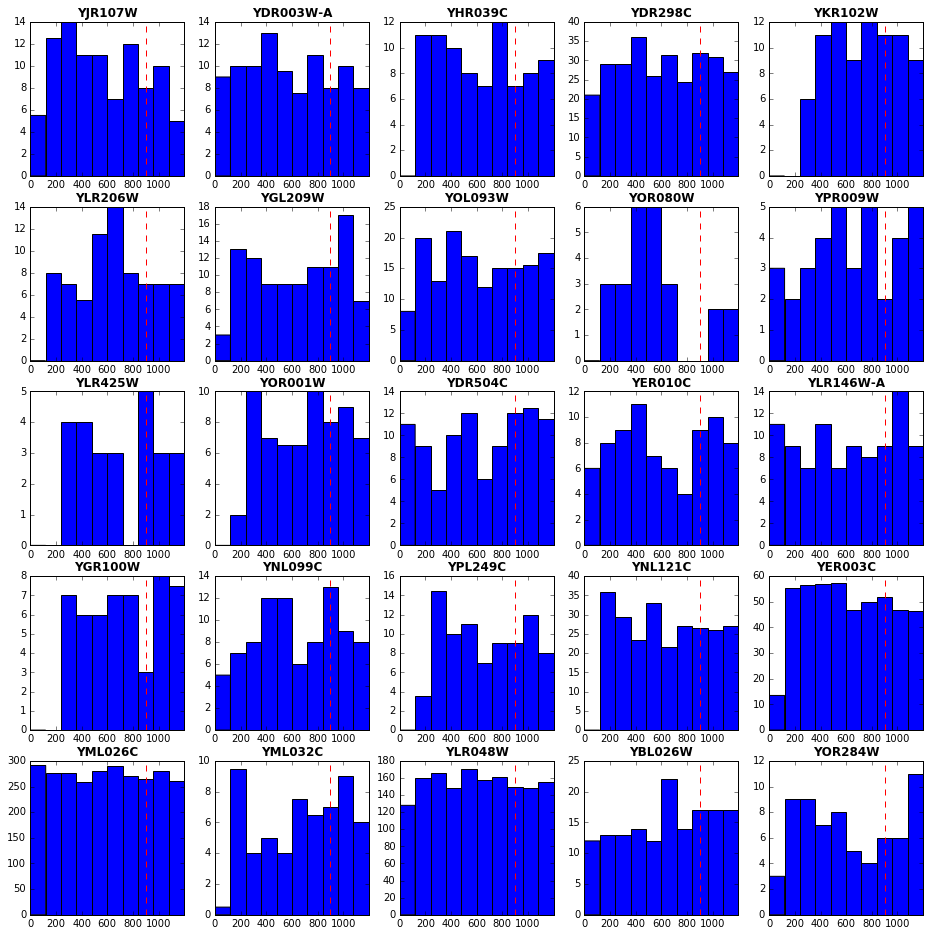

In [11]:
burnin = len(yseries) - 300  # 300 s simulation, rest is burn-in
fig, ax = plt.subplots(size, size, figsize=(16, 16))

for i in range(size):
    for j in range(size):
        yseries = results[time]['timecourses'][protnames_plot[i][j]]
        dy = np.gradient(yseries)
        xseries = np.arange(0., float(len(dy)), 1.)
        # oddly, sometimes the simulation sometimes 'loses' one data point
        length = min(len(xseries), len(yseries))
        ax[i, j].hist(xseries, bins=10, weights=dy)
        ax[i, j].axvline(burnin, color='red', linestyle='--')
        ax[i, j].set_xticks(np.arange(min(xseries), max(xseries)+1, 200.0))
        ax[i, j].set_title(protnames_plot[i][j], fontdict={'fontsize': 12, 'fontweight': 'bold'})
        ax[i, j].tick_params(axis='both', which='major', labelsize=10)

## 3. Plot proteomes at different times

In [10]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    #fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys)
    scat.set_alpha(0.2)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    #plt.show()

Prevent output from scrolling:

In [11]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 999;

<IPython.core.display.Javascript object>

3586


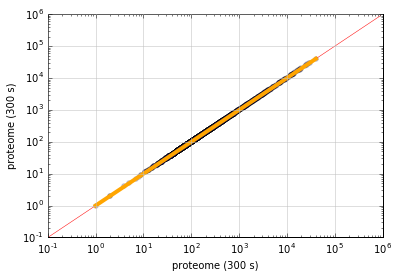

3161


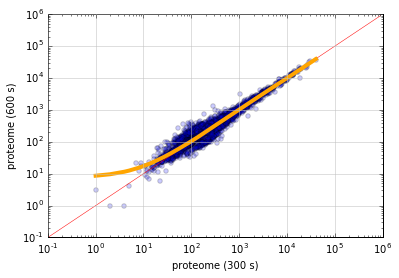

3531


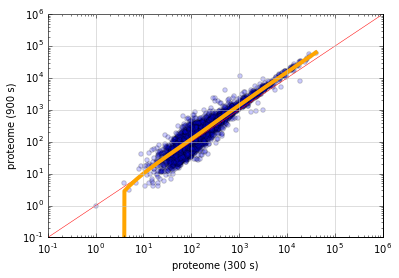

3518


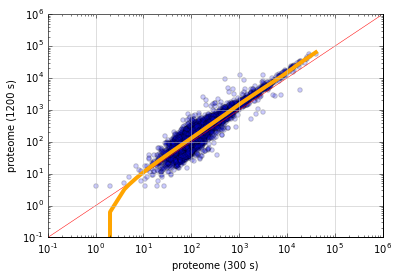

3536


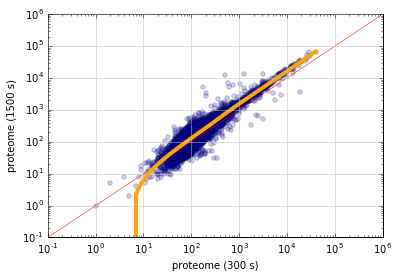

3552


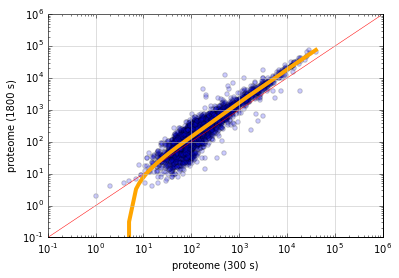

3564


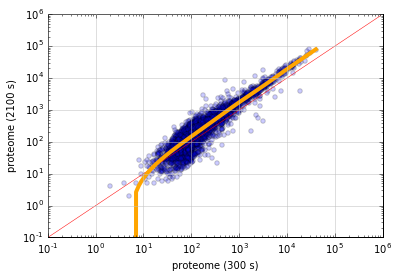

3560


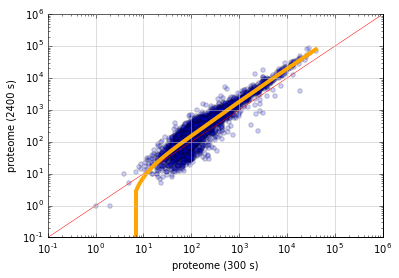

3377


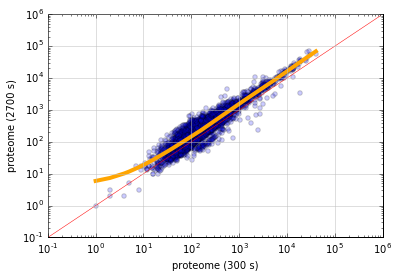

3408


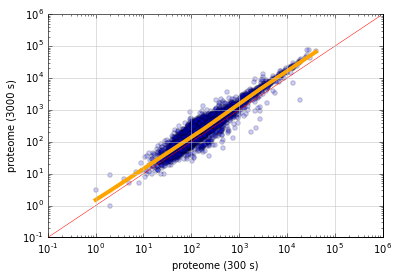

3263


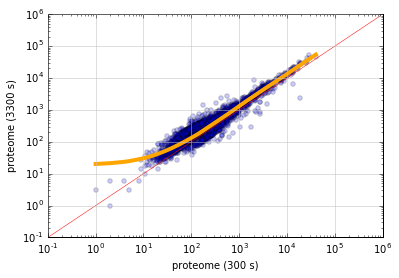

3458


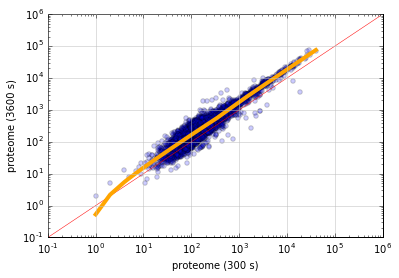

3161


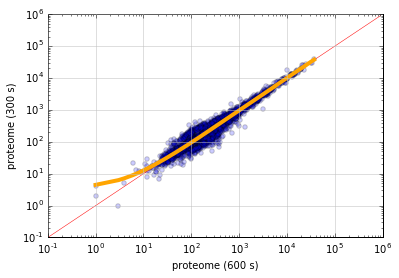

3560


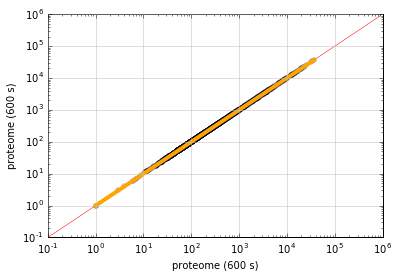

3532


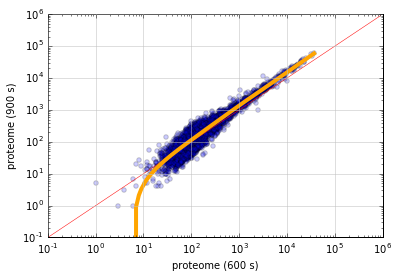

3513


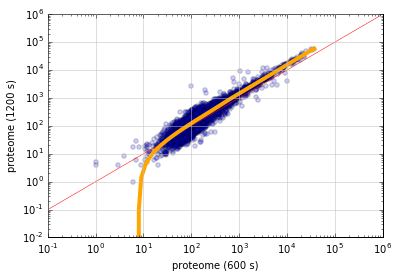

3527


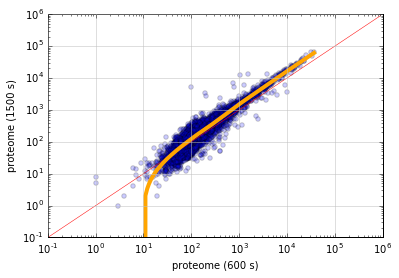

3514


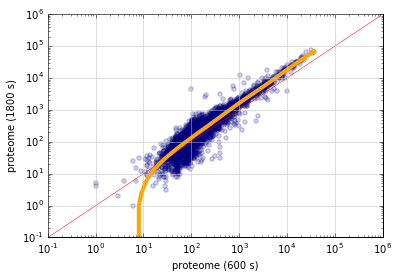

3528


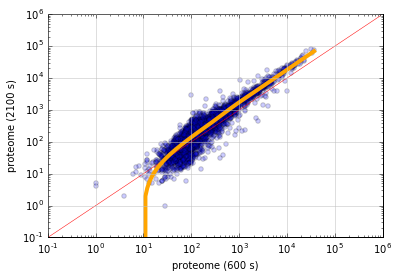

3526


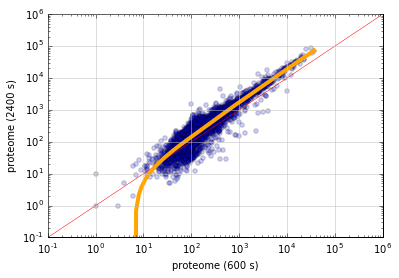

3339


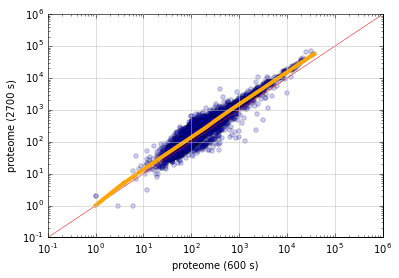

3359


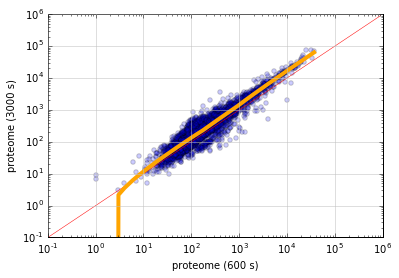

3209


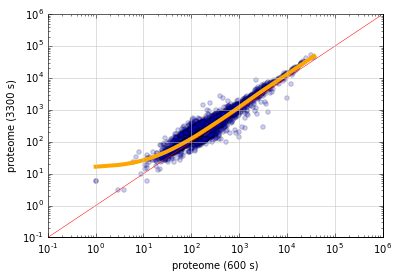

3427


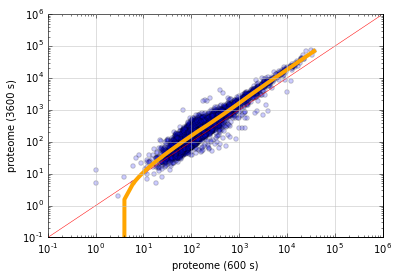

3531


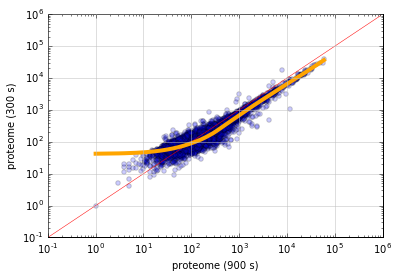

3532


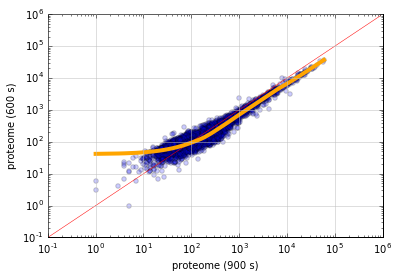

4920


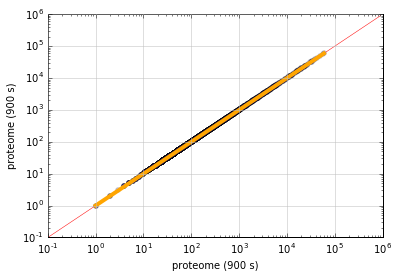

4540


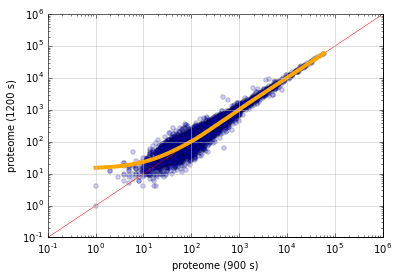

4611


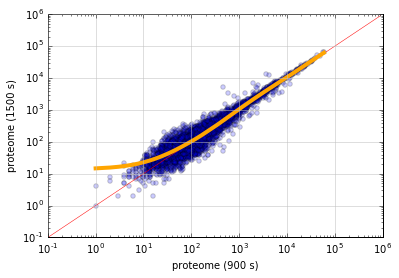

4614


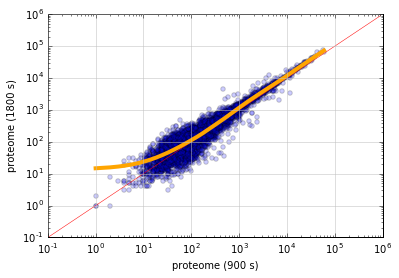

4724


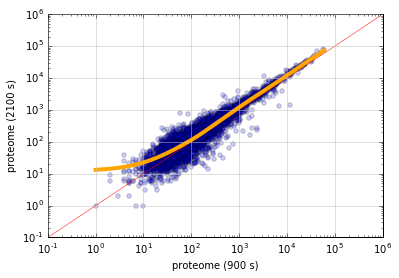

4704


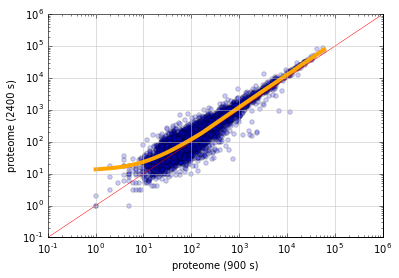

4114


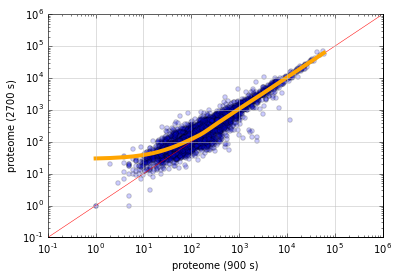

4171


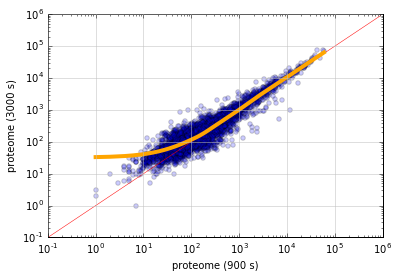

3725


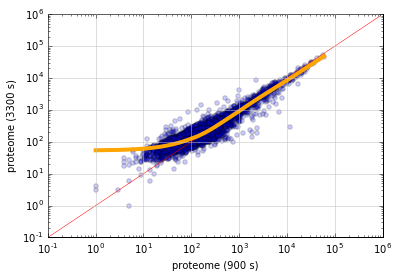

4256


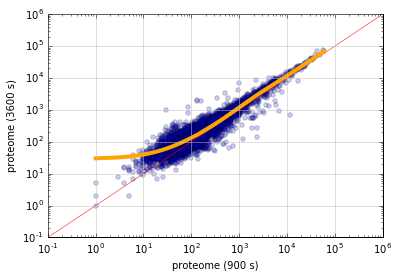

3518


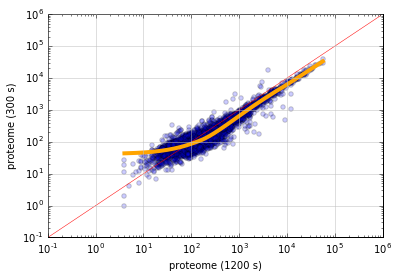

3513


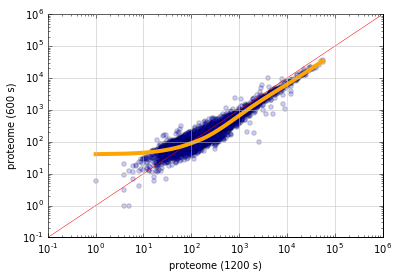

4540


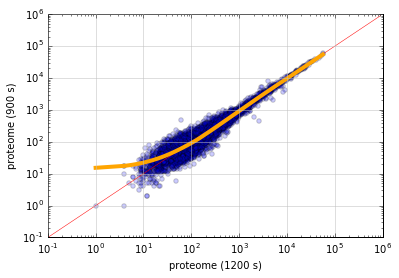

4812


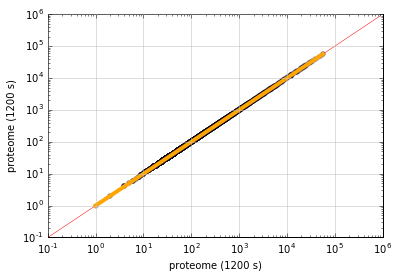

4581


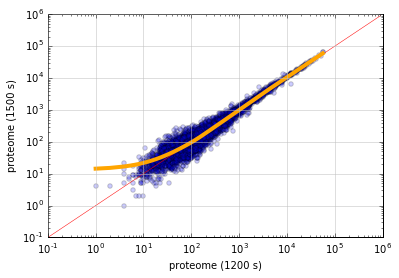

4588


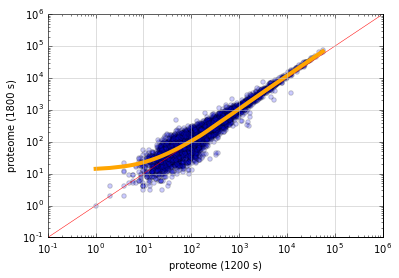

4666


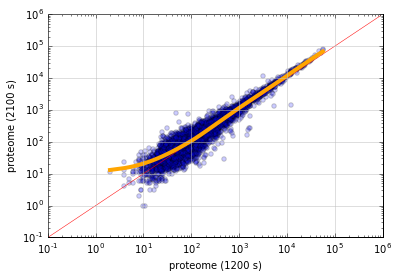

4657


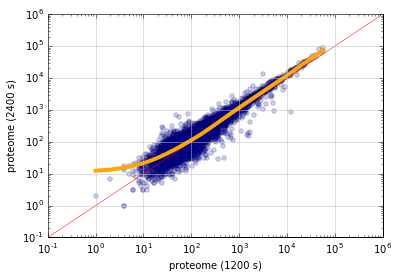

4080


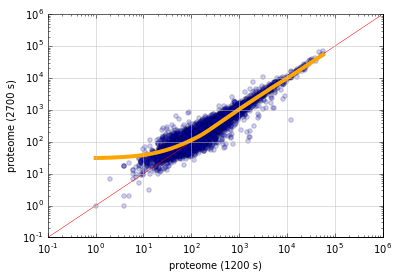

4154


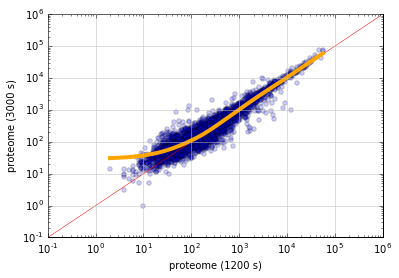

3726


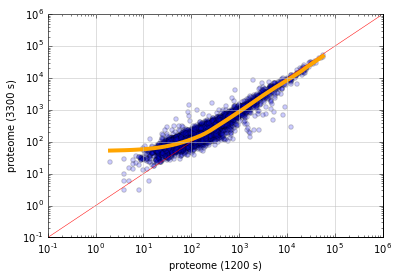

4237


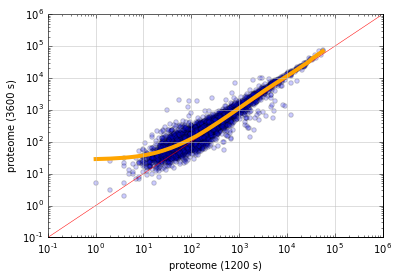

3536


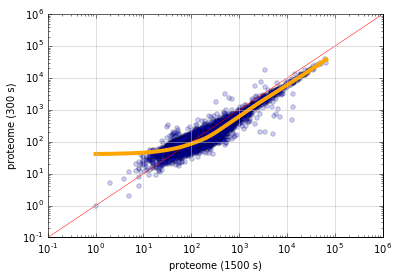

3527


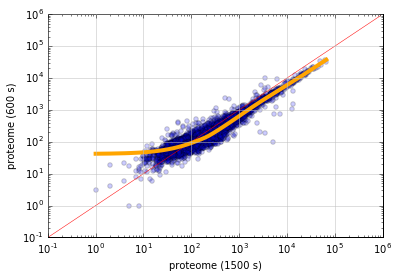

4611


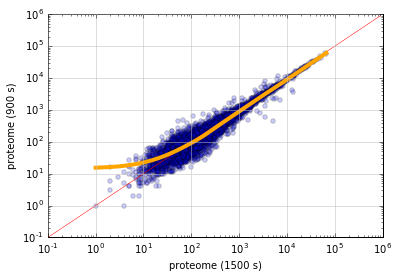

4581


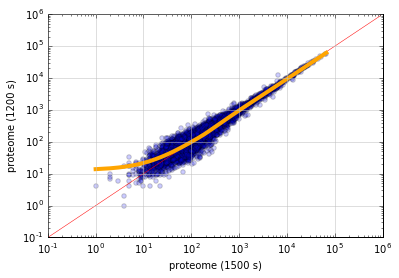

4916


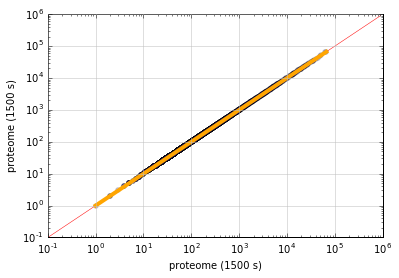

4672


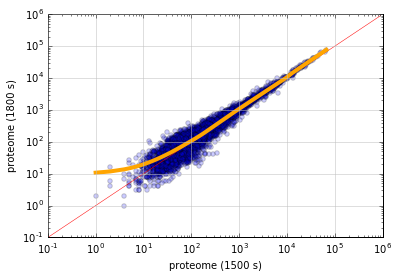

4773


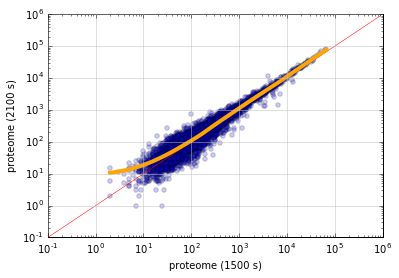

4753


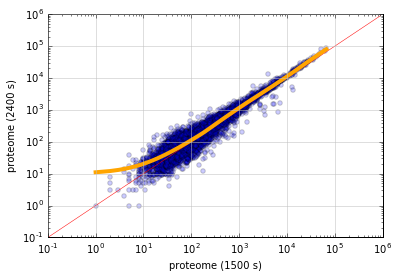

4145


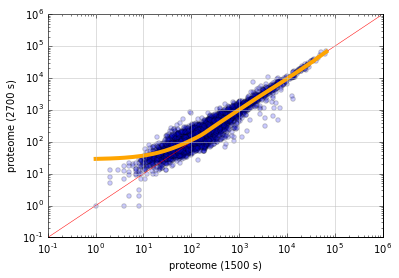

4218


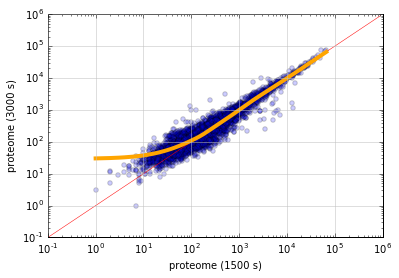

3745


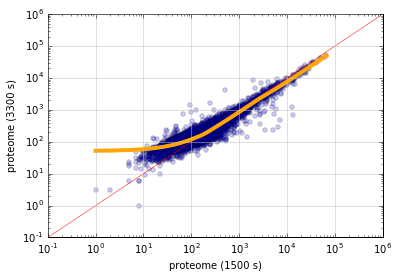

4296


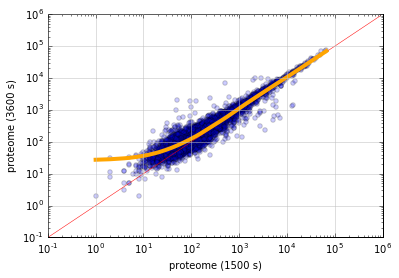

3552


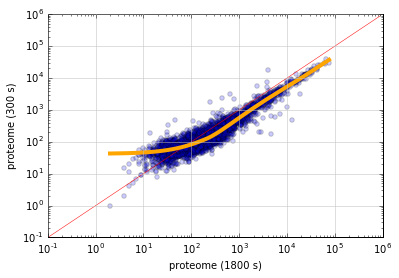

3514


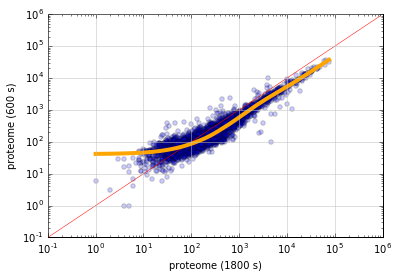

4614


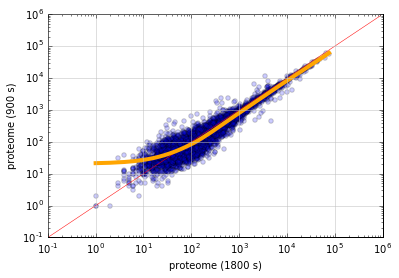

4588


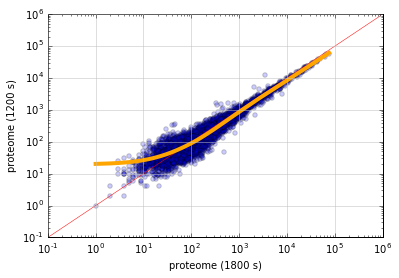

4672


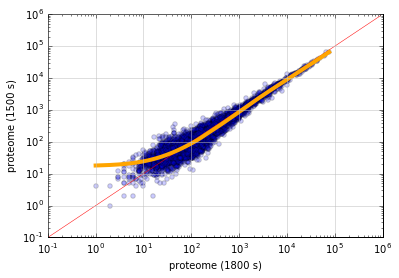

4982


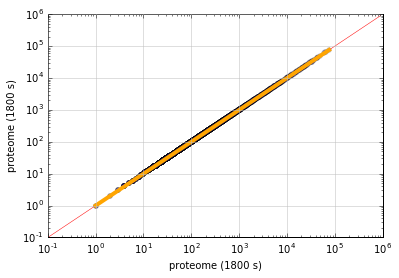

4795


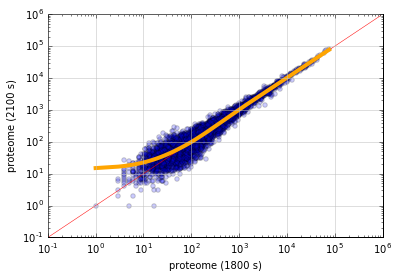

4780


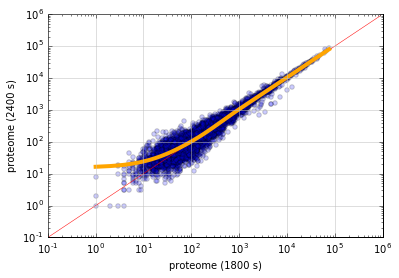

4132


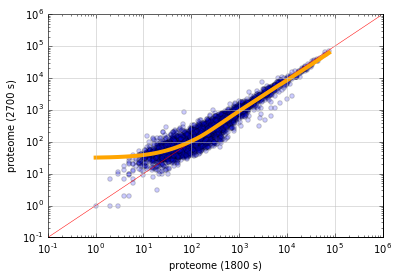

4234


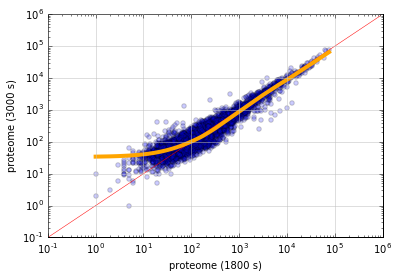

3755


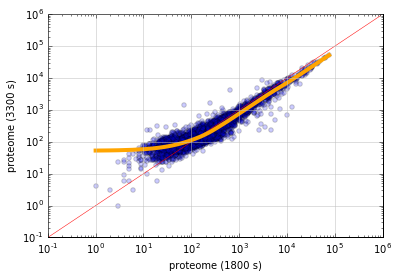

4297


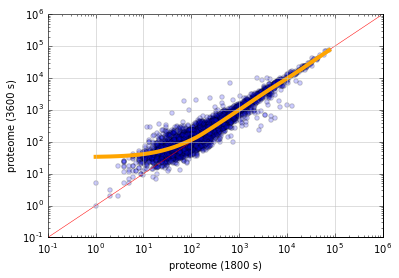

3564


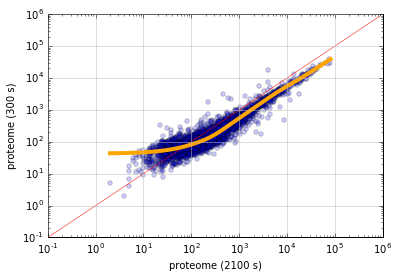

3528


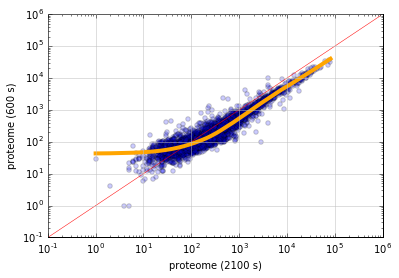

4724


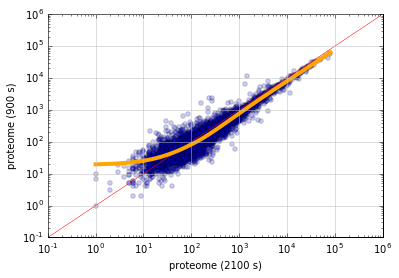

4666


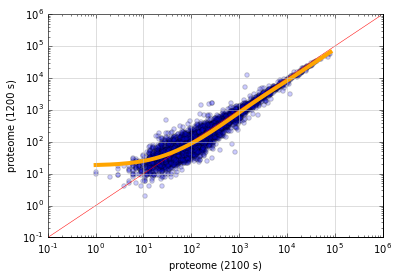

4773


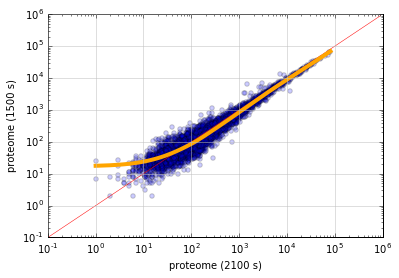

4795


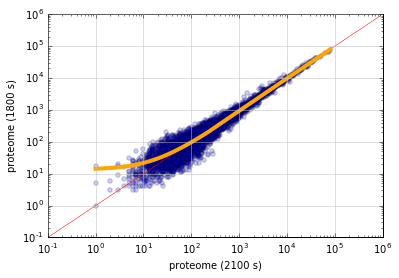

5167


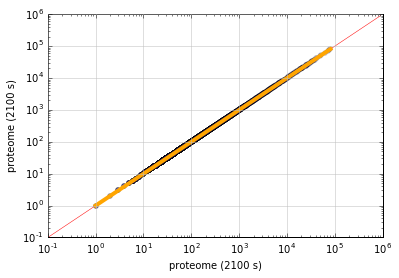

4916


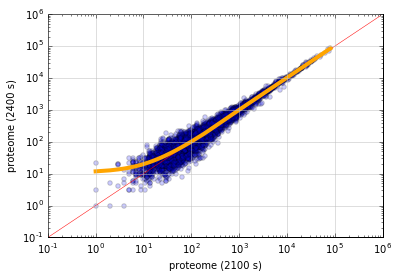

4203


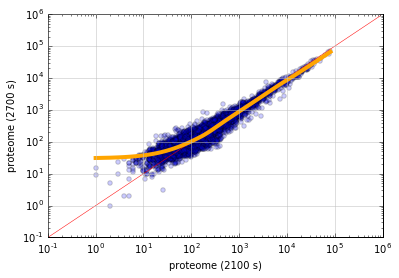

4294


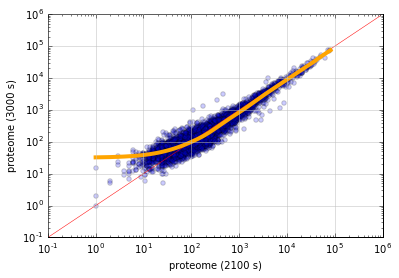

3785


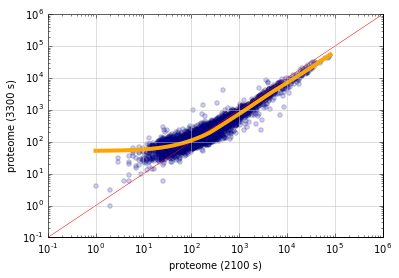

4363


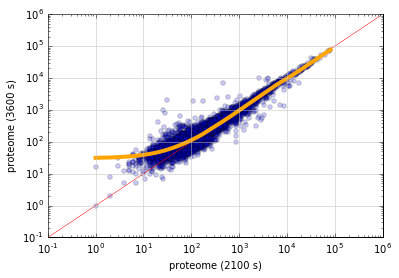

3560


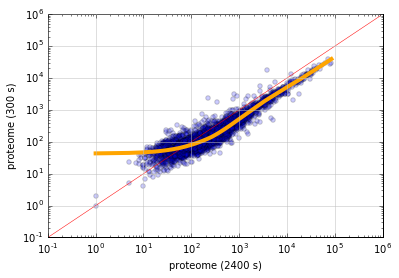

3526


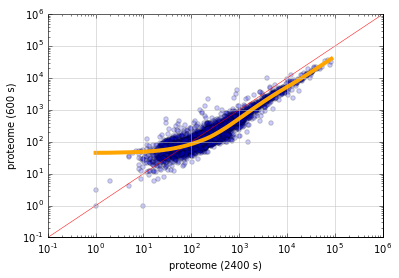

4704


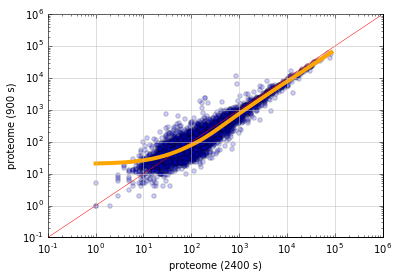

4657


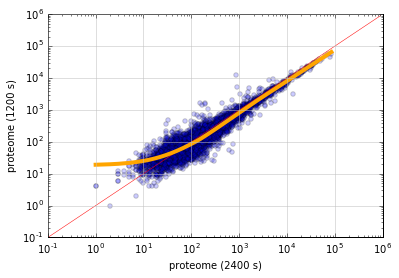

4753


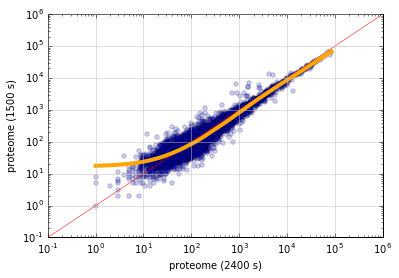

4780


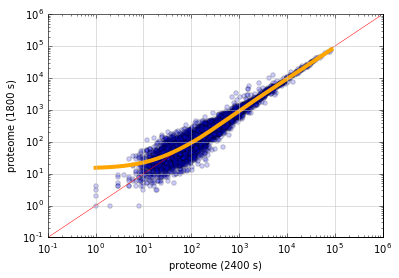

4916


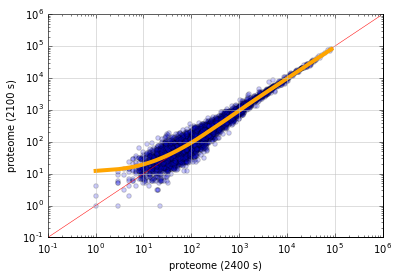

5148


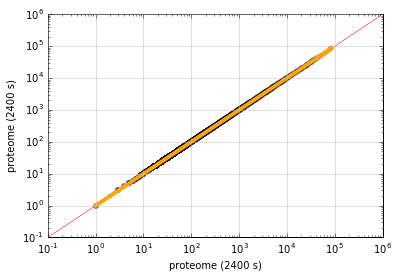

4214


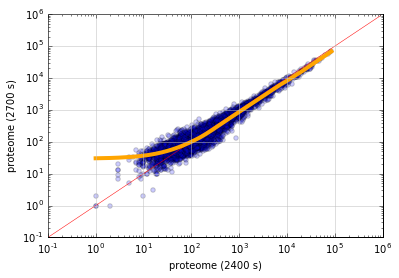

4299


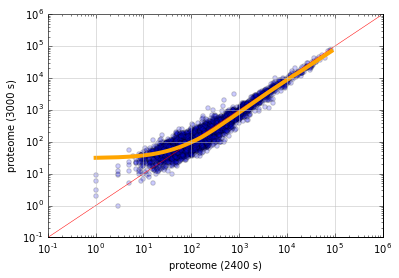

3787


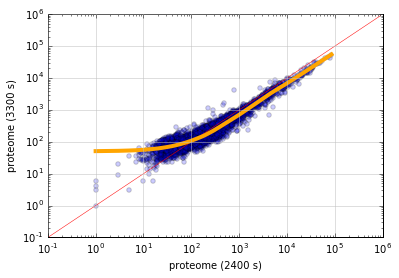

4364


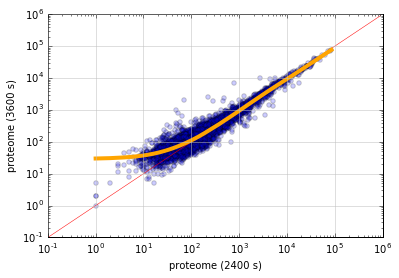

3377


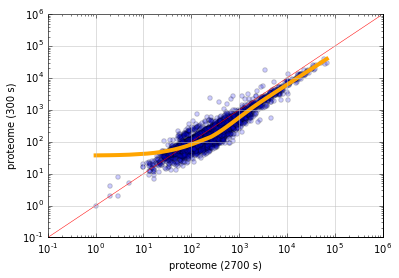

3339


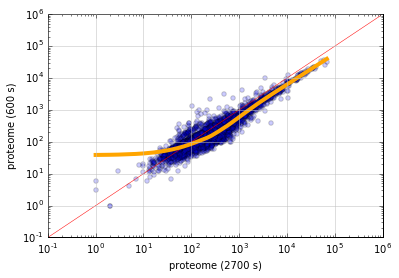

4114


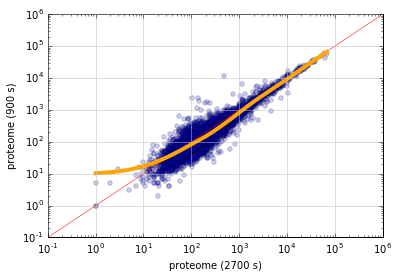

4080


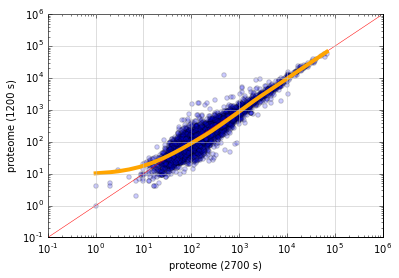

4145


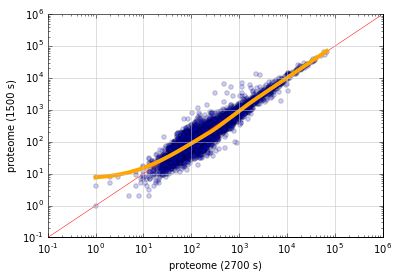

4132


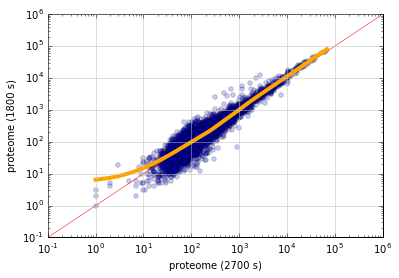

4203


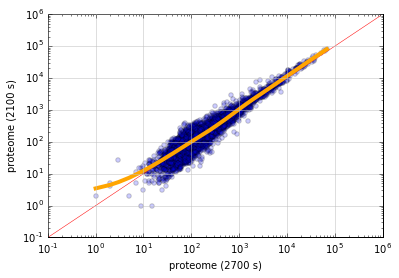

4214


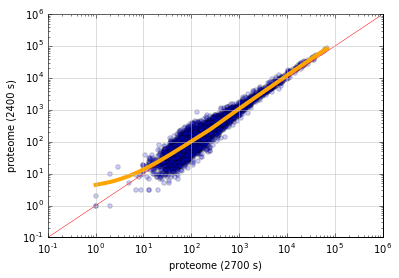

4281


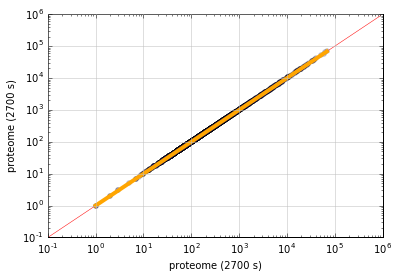

3882


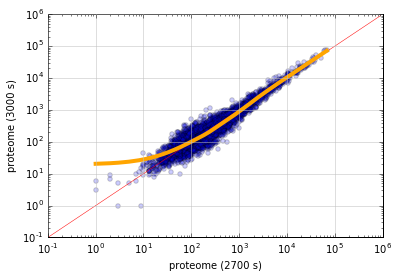

3564


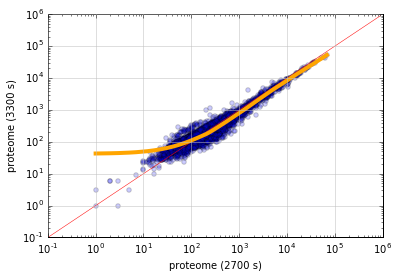

3952


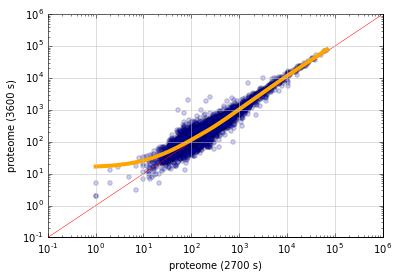

3408


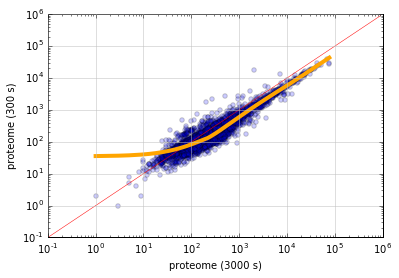

3359


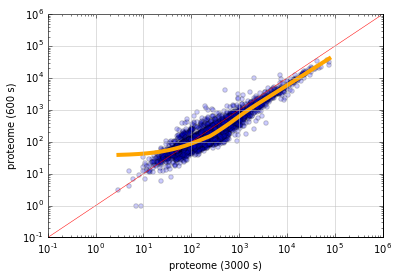

4171


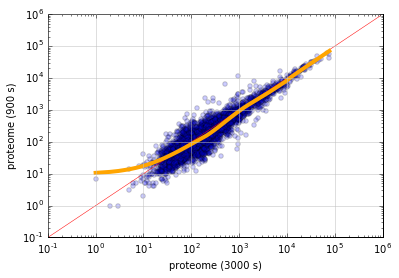

4154


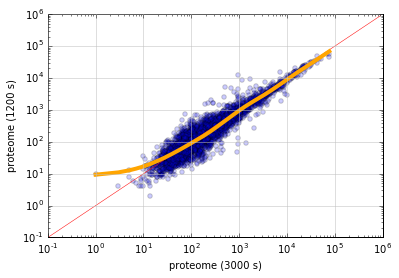

4218


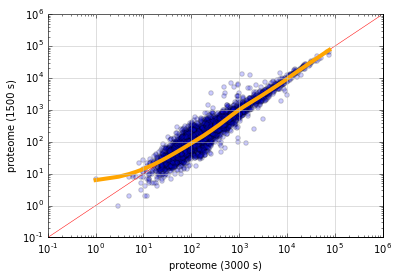

4234


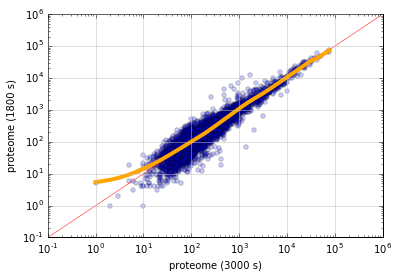

4294


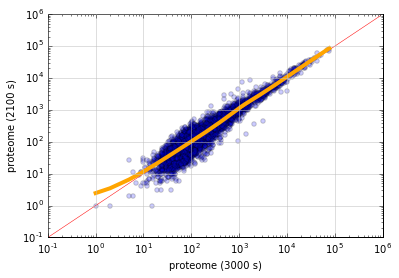

4299


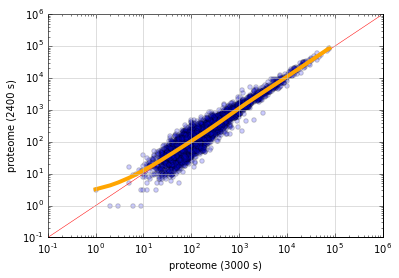

3882


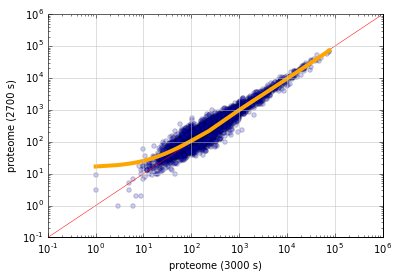

4359


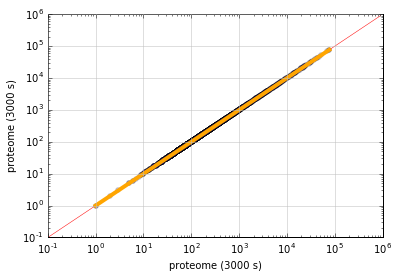

3624


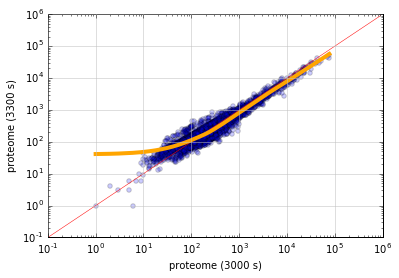

4018


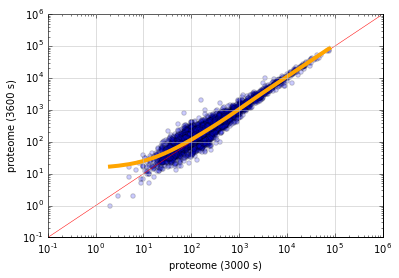

3263


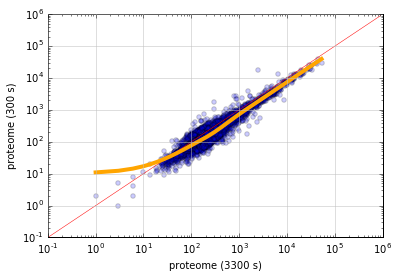

3209


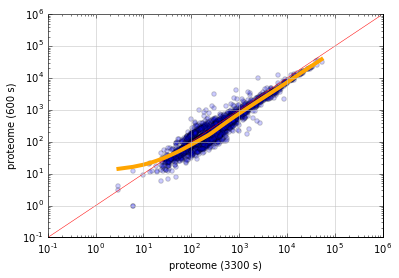

3725


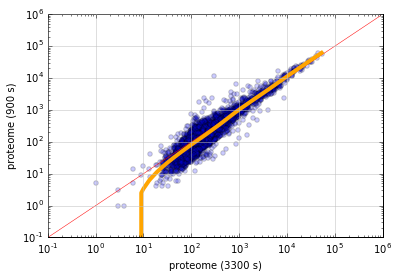

3726


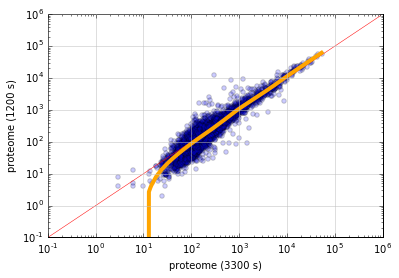

3745


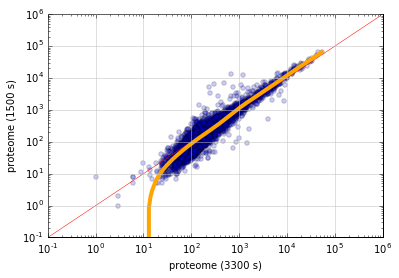

3755


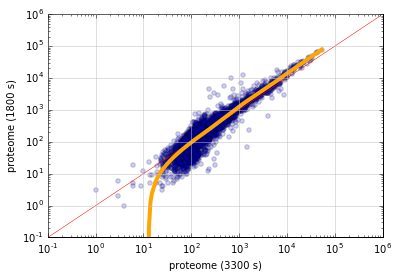

3785


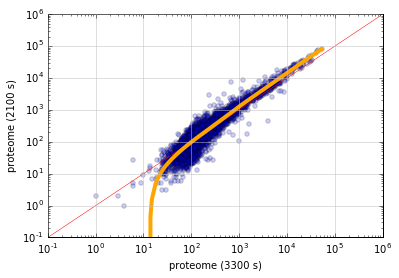

3787


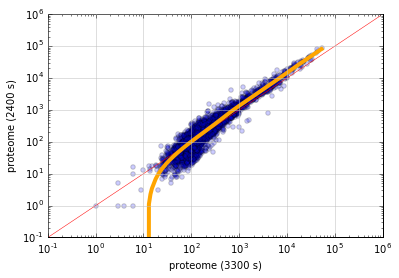

3564


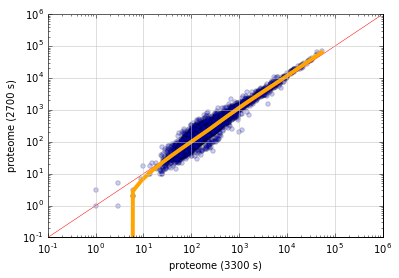

3624


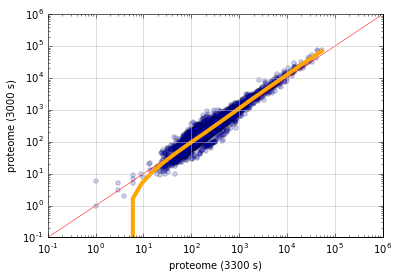

3802


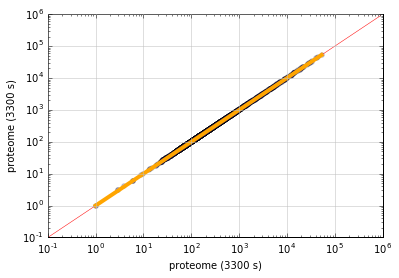

3660


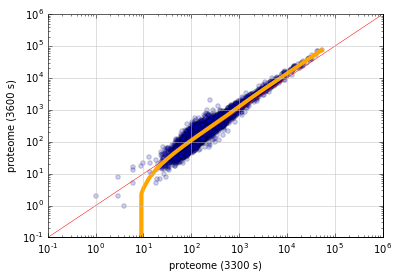

3458


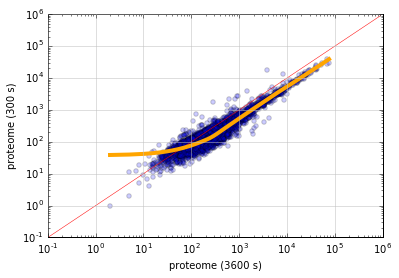

3427


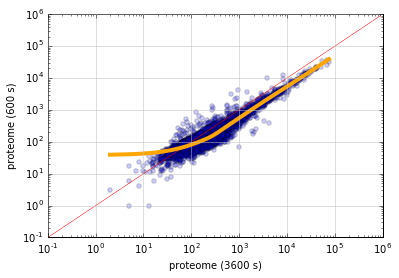

4256


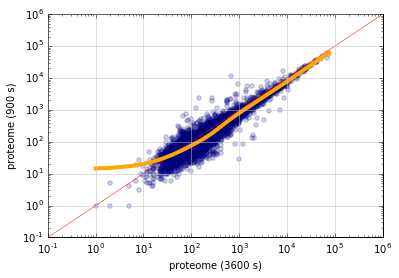

4237


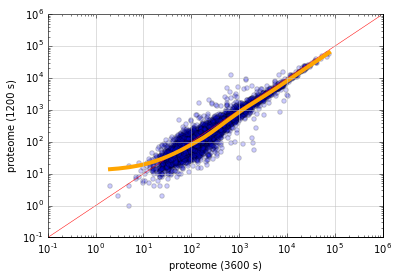

4296


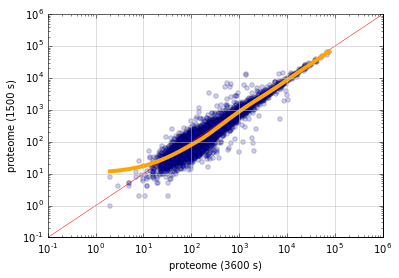

4297


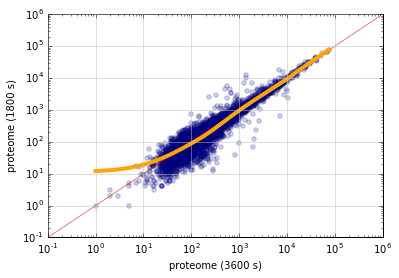

4363


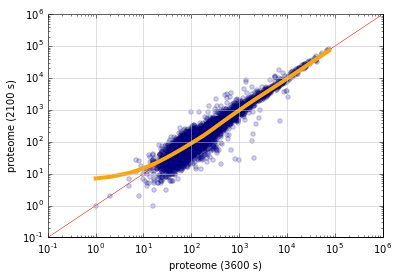

4364


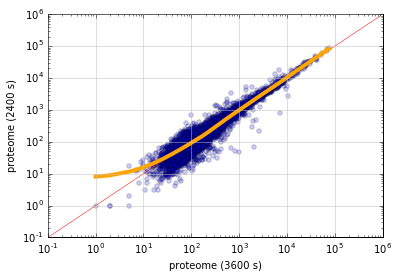

3952


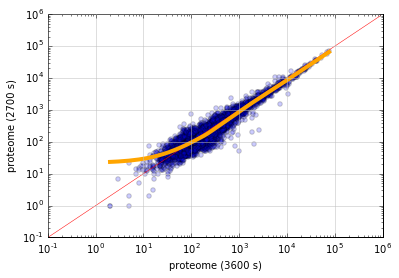

4018


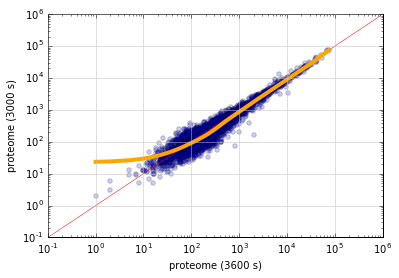

3660


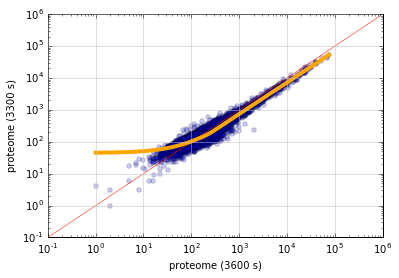

4431


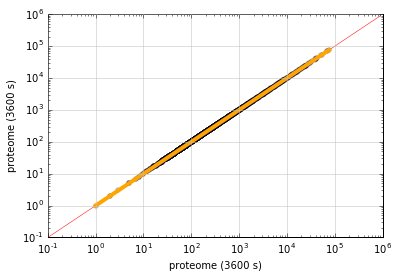

In [12]:
times = np.arange(0, 3600, 300)[:5]
columns = 3
rows = len(times/columns)
for tx in times:
    #fig, ax = plt.subplots(rows, columns, figsize=(16, 16))
    for ty in times:
        fig =  plt.figure()                
        plt.plot([1e-1, 1e6-100000], [1e-1, 1e6-100000], color='red', linestyle='-', linewidth=0.5)
        scatter_dicts(proteome[tx], proteome[ty], xaxislabel="proteome ({} s)".format(tx+300), 
                      yaxislabel="proteome ({} s)".format(ty+300), fontsize=None)
        plt.show()

## 4. Plot translational impact

First we check whether the relevant genes are in our data set.

Histones from http://wcmwiki.pbworks.com/w/page/103620021/20151208_Histones:

In [12]:
len(results[time]['timecourses'].keys())

3611

In [13]:
histones = ['YDR224C', 'YBL002W', 'YDR225W', 'YBL003C', 'YOL012C', 'YBR009C', 'YNL030W', 'YBR010W', 'YNL031C', 'YPL127C']

In [14]:
for histone in histones:
    print "Histone {} found in data set: {}".format(histone, histone in results[time]['timecourses'])

Histone YDR224C found in data set: True
Histone YBL002W found in data set: True
Histone YDR225W found in data set: True
Histone YBL003C found in data set: True
Histone YOL012C found in data set: True
Histone YBR009C found in data set: True
Histone YNL030W found in data set: True
Histone YBR010W found in data set: True
Histone YNL031C found in data set: True
Histone YPL127C found in data set: True


Transcription factors from https://bitbucket.org/wcm-team/gene_regulation/src/2cc7fcaefff9cd5ec89783253b281cebfbb88d32/model/input.py?at=master&fileviewer=file-view-default:

In [15]:
TFs = ["YNL027W", "YLR113W", "YMR174W", "YER062C", "YHR084W", "YDL056W", "YLR182W", "YER111C", "YLR118W", "YMR043W"]

In [16]:
for TF in TFs:
    print "TF {} found in data set: {}".format(TF, TF in results[time]['timecourses'])

TF YNL027W found in data set: True
TF YLR113W found in data set: True
TF YMR174W found in data set: False
TF YER062C found in data set: True
TF YHR084W found in data set: False
TF YDL056W found in data set: True
TF YLR182W found in data set: True
TF YER111C found in data set: True
TF YLR118W found in data set: False
TF YMR043W found in data set: True


Get mRNAs:

In [17]:
transcriptomes_dict = collections.OrderedDict(sorted(
        pkl.load((open('../parameters/transcriptome_time_dependent.p'))).items()))

In [18]:
transcriptomes_dict.keys()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

In [19]:
absolute_transcript_count = {time: sum(transcriptomes_dict[time].values()) for time in sorted(transcriptomes_dict.keys())}

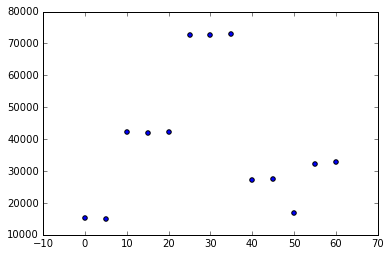

In [20]:
plt.scatter(absolute_transcript_count.keys(), absolute_transcript_count.values(), marker='o')

Generate fold-changes for transcriptome:

In [21]:
time = 30 * 60

In [22]:
print len(transcriptomes_dict[time/60])
print len(transcriptomes_dict[0])

6651
6651


In [23]:
def scatter_dicts_interactive(dict1,  dict2, xaxislabel=None, yaxislabel=None, fontsize=None):
    from bokeh.plotting import figure, show, ColumnDataSource
    from bokeh.models import HoverTool
    from bokeh.io import output_notebook
    
    plotkeys = list(dict1.viewkeys() & dict2.viewkeys()) # set intersection
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    plt.close()
    output_notebook()

    source = ColumnDataSource(data=dict(x=xs, y=ys, desc=plotkeys, ))

    hover = HoverTool(
            tooltips=[
                #("index", "$index"),
                #("(x,y)", "($x, $y)"),
                ("", "@desc"),
            ]
        )

    p = figure(plot_width=400, plot_height=400, tools=[hover,"wheel_zoom,box_zoom,reset"],
               x_axis_type="log", x_range=[1e-2, 1e3], 
               y_axis_type="log", y_range=[1e-2, 1e3], 
               title="",)

    p.scatter('x', 'y', size=5, source=source, fill_color=None, fill_alpha=0.6, line_color='red')

    show(p)

In [24]:
scatter_dicts_interactive(transcriptomes_dict[time/60], transcriptomes_dict[0])

Loading BokehJS ...

## 5. Analysis Katja (highly abundant periodic genes)

In [35]:
genes_shortlist = {'HHF1': 'YBR009C', 'HHF2': 'YNL030W', 'HHT1': 'YBR010W', 'HHT2': 'YNL031C', 'HTB1': 'YDR224C', 
                   'HTB2': 'YBL002W', 'PMA1': 'YGL008C', 'RNR1': 'YER070W', 'RNR2': 'YJL026W', 'RNR3': 'YIL066C', 
                   'RNR4': 'YGR180C'}

In [53]:
translatome_shortlist = {}

for (genecommon, gene) in genes_shortlist.items():
    translatome_shortlist[genecommon] = []
    for time in np.arange(0, 3600, 300):
        if gene in results[time]['timecourses']:
            rate = float(results[time]['timecourses'][gene][-1]-results[time]['timecourses'][gene][-301])/300.
        else:
            rate = 0.
        translatome_shortlist[genecommon].append(rate)

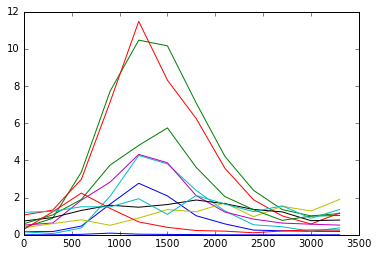

In [59]:
for gene in translatome_shortlist:
    plt.plot(np.arange(0, 3600, 300), translatome_shortlist[gene], label=gene)
plt.show()

In [57]:
translatome_shortlist

{'HHF1': [0.16333333333333333,
  0.06333333333333334,
  0.37,
  2.0733333333333333,
  4.266666666666667,
  3.81,
  2.3866666666666667,
  1.2833333333333334,
  0.54,
  0.43333333333333335,
  0.19,
  0.37],
 'HHF2': [0.5233333333333333,
  0.6333333333333333,
  1.8633333333333333,
  2.83,
  4.323333333333333,
  3.8733333333333335,
  2.1066666666666665,
  1.2266666666666666,
  0.8433333333333334,
  0.63,
  0.57,
  0.52],
 'HHT1': [0.16666666666666666,
  0.17333333333333334,
  0.47,
  1.6466666666666667,
  2.77,
  2.09,
  1.0266666666666666,
  0.5866666666666667,
  0.25333333333333335,
  0.21666666666666667,
  0.19,
  0.18666666666666668],
 'HHT2': [0.5966666666666667,
  1.07,
  1.9,
  3.7466666666666666,
  4.806666666666667,
  5.746666666666667,
  3.63,
  2.0566666666666666,
  1.35,
  0.7766666666666666,
  1.0033333333333334,
  1.04],
 'HTB1': [1.0633333333333332,
  1.3266666666666667,
  2.98,
  7.13,
  11.473333333333333,
  8.316666666666666,
  6.253333333333333,
  3.5833333333333335,
  1